In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter/folder" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

In [2]:
# Sets the voice on Channel 5 as SybthStrings 1
ProgramChange(Channel(5), 51) >> Play()

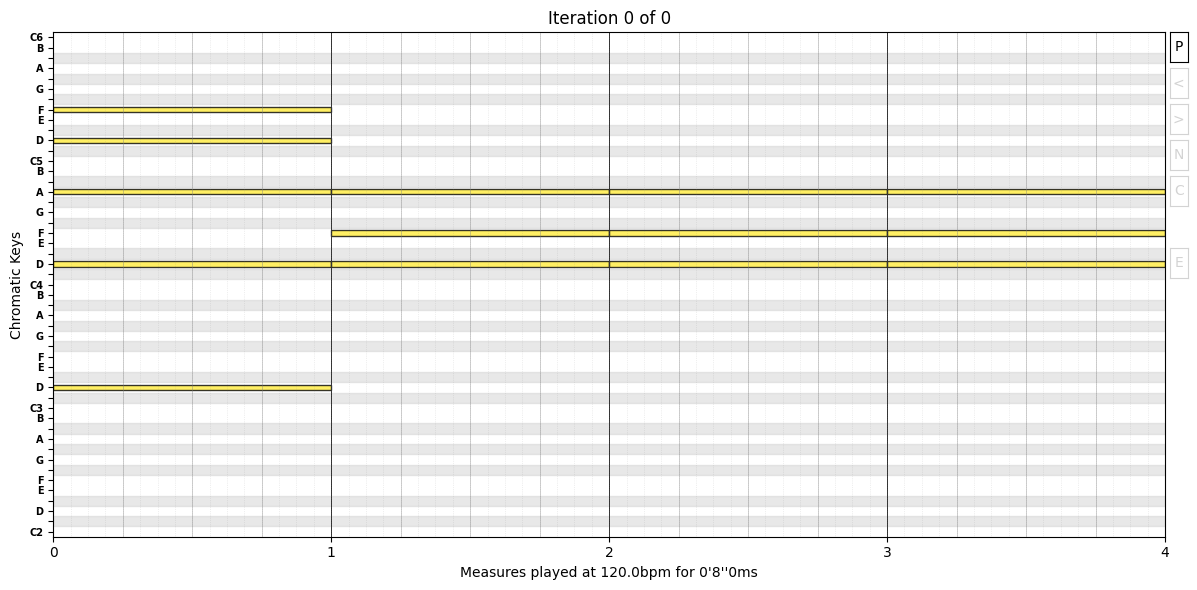

In [3]:
# Starts by sequencing 4 chords on Channel 5
chords_d_minor = PitchChord(Channel(5)) / 4
# Sets the Tonic note D and the minor key signature for all
chords_d_minor << TonicKey("D") << Minor()
# Note that these parameters are addictive, so, 4.0 will mean 5.0, the fifth, because, 1.0 + 4.0, and 2.0 will be the 3rd, 1.0 + 2.0 !
chords_d_minor << First()**[Octave(-1), 0, Octave(1), 5.0 - 1, {1: 3.0 - 1}]
chords_d_minor >> Plot()

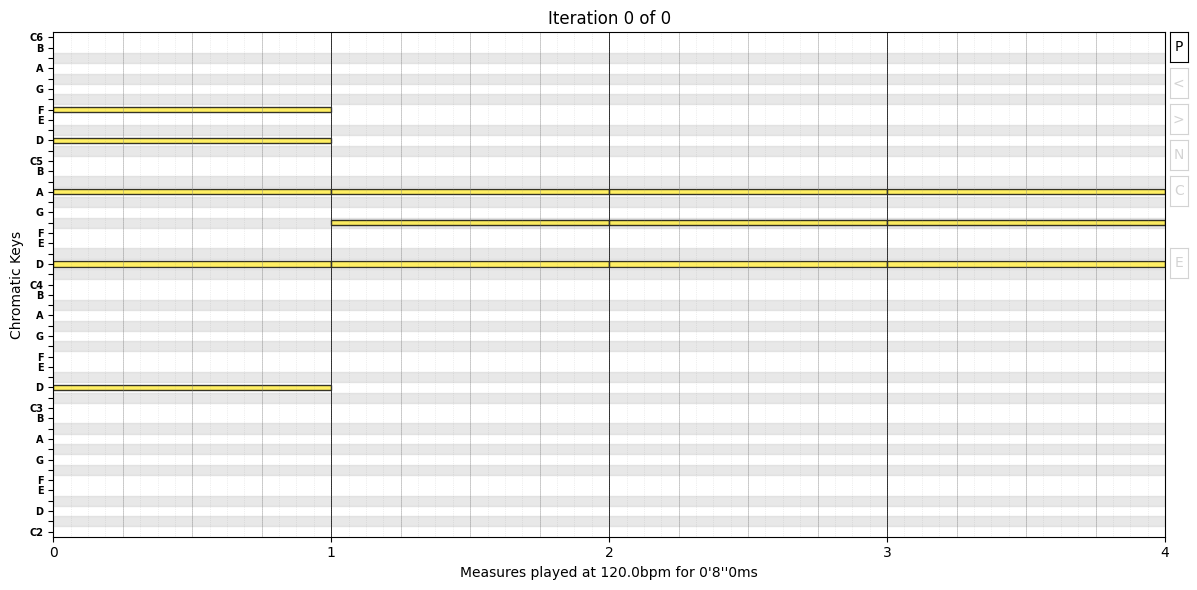

In [4]:
# Reset each KeySignature accordingly
chords_d_minor << Foreach(Minor(), Major(), Major(), Major())
chords_d_minor >> Plot()

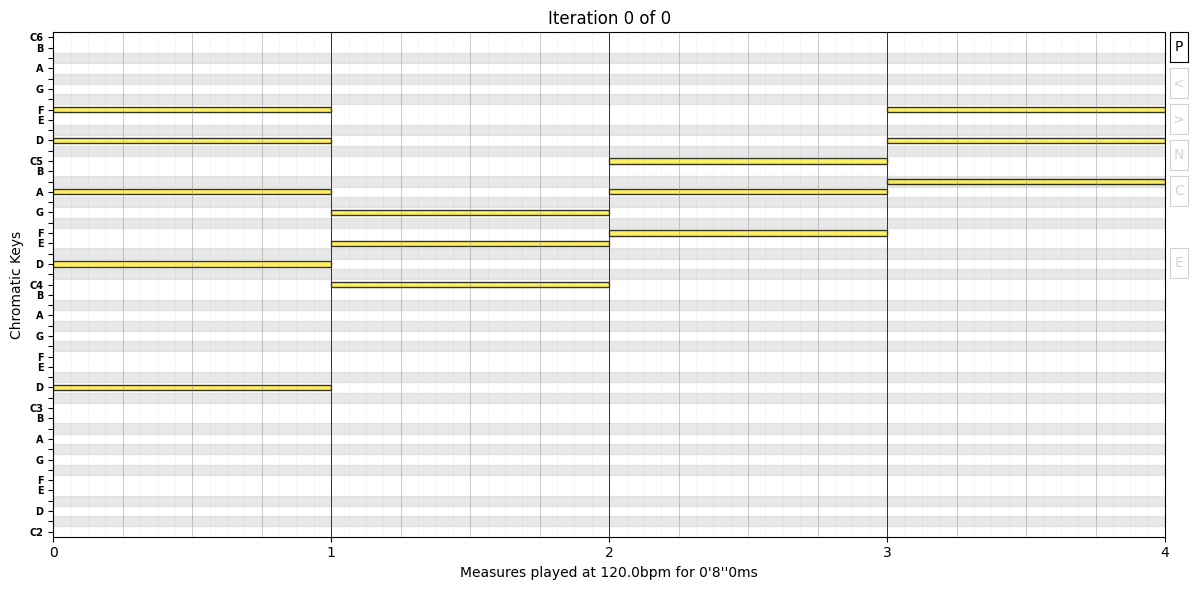

In [5]:
# Sets the remaining Tonic Keys
chords_d_minor.mask(Greater(Measure(0))) << Foreach("C", "F", "Bb")**TonicKey()
chords_d_minor >> Plot()

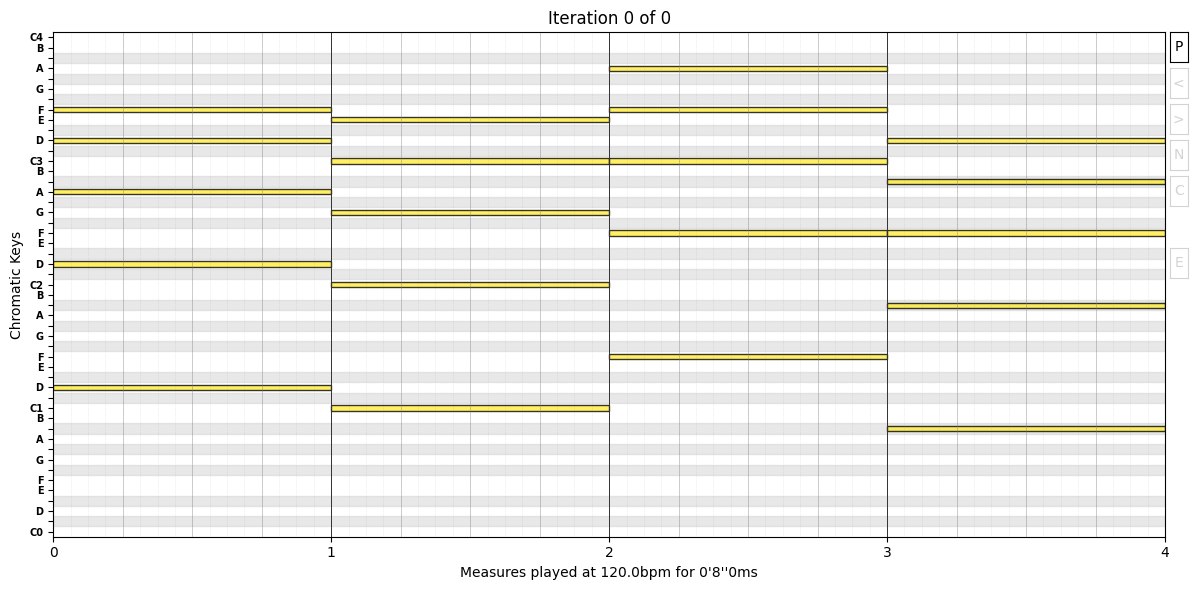

In [6]:
# Resets the original pitch notes to each PitchChord with the Frame All
chords_d_minor << [Octave(-1), 0, Octave(1), 5.0 - 1, {1: 3.0 - 1}]
chords_d_minor << Octave(2) << Last()**Octave(1)
chords_d_minor >> Plot()

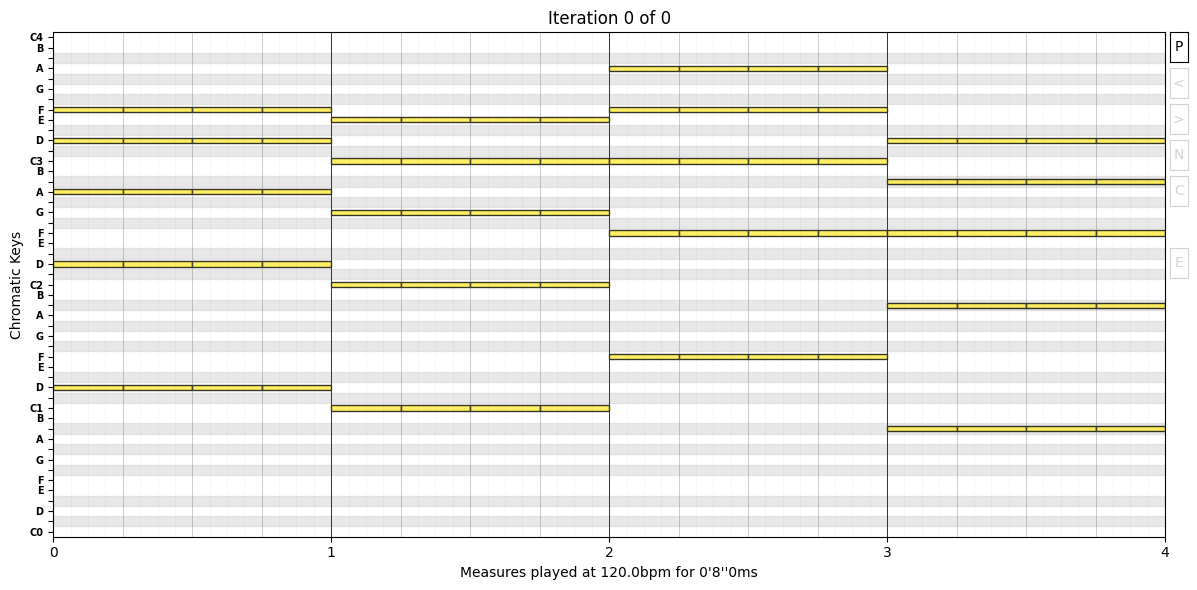

In [7]:
chords_d_minor //= NoteValue(1/4)
chords_d_minor >> Plot()

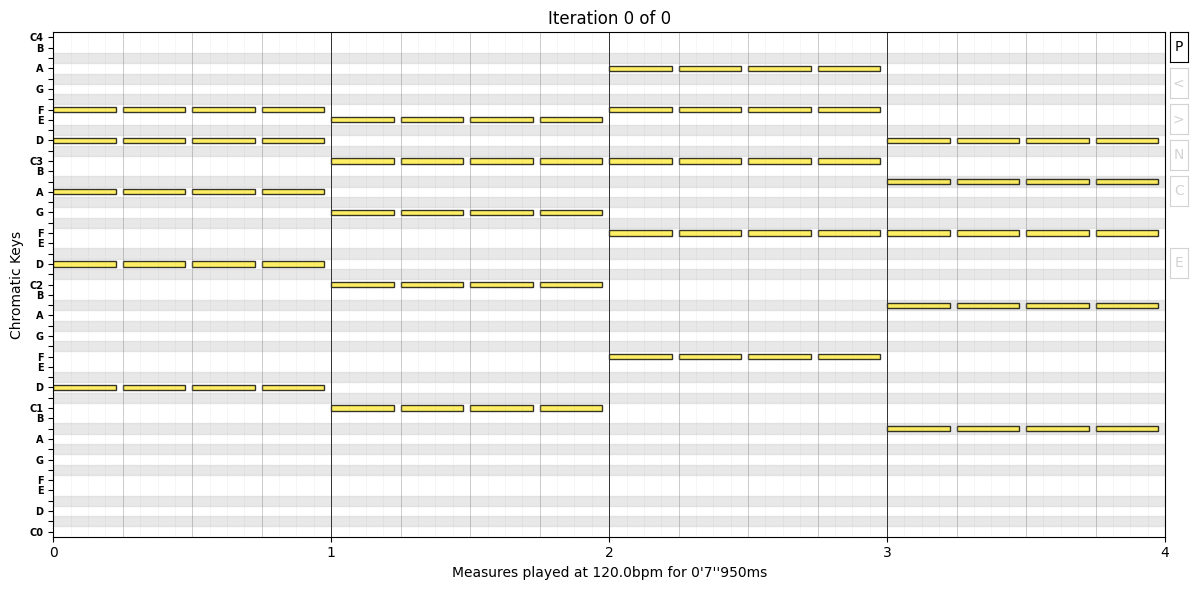

In [8]:
chords_d_minor *= Duration(0.9)
chords_d_minor >> Plot()

In [9]:
# It's possible to save a given Clip and open it in other notebook
chords_d_minor >> Save("save_chords_d_minor.json")

In [10]:
# The previously saved Clip can now be loaded with another name
loaded_chord = Load("save_chords_d_minor.json")

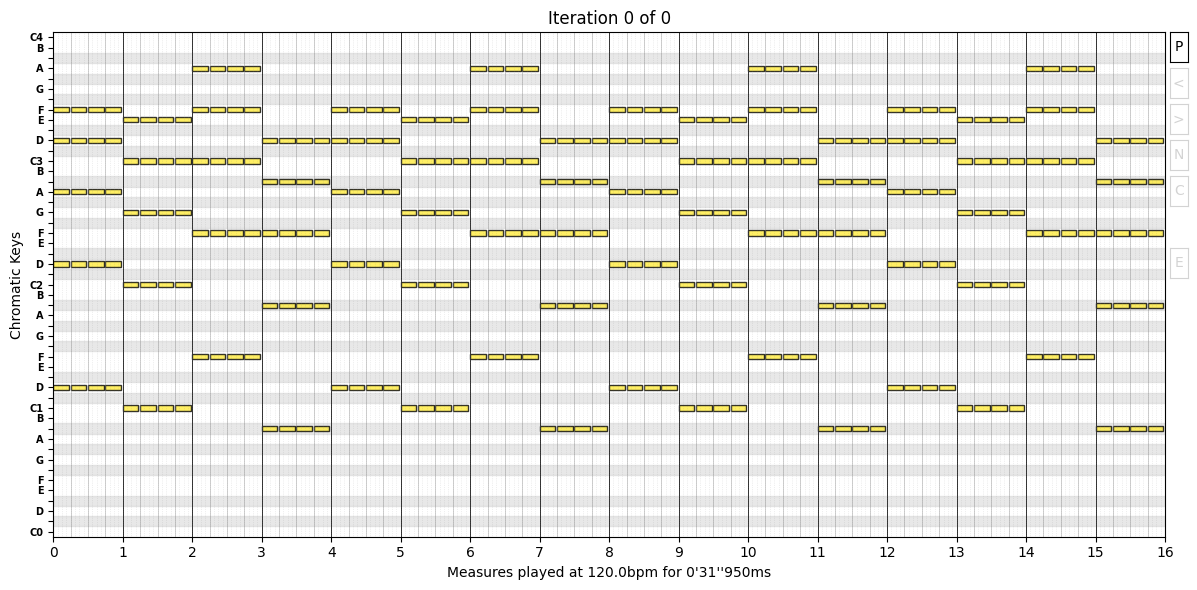

In [11]:
loaded_chord * 4 >> Plot()

# Book example based on the D minor
## Book chord progression
I D minor
VII C major
III F major
VI Bb major
## Key Signature for D minor
A minor is the one without sharps or flats, and D comes before A in the cyrcle of fifths, so, it represents 1 flat, meaning>
D minor is `KeySignature(Minor(), -1)`

In [12]:
# Setting the default Key Signature
settings << KeySignature(Minor(), -1)

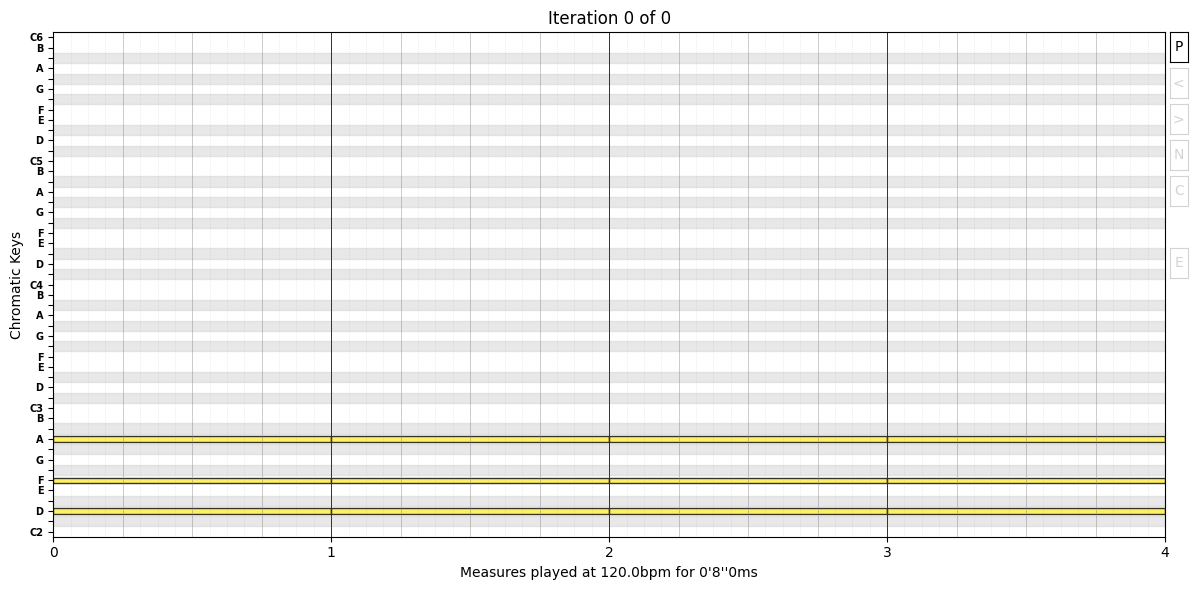

In [13]:
# This will generate the 4 D minor triads by default
four_chords = PitchChord(Octave(2), Channel(5)) / 4
four_chords >> Plot()

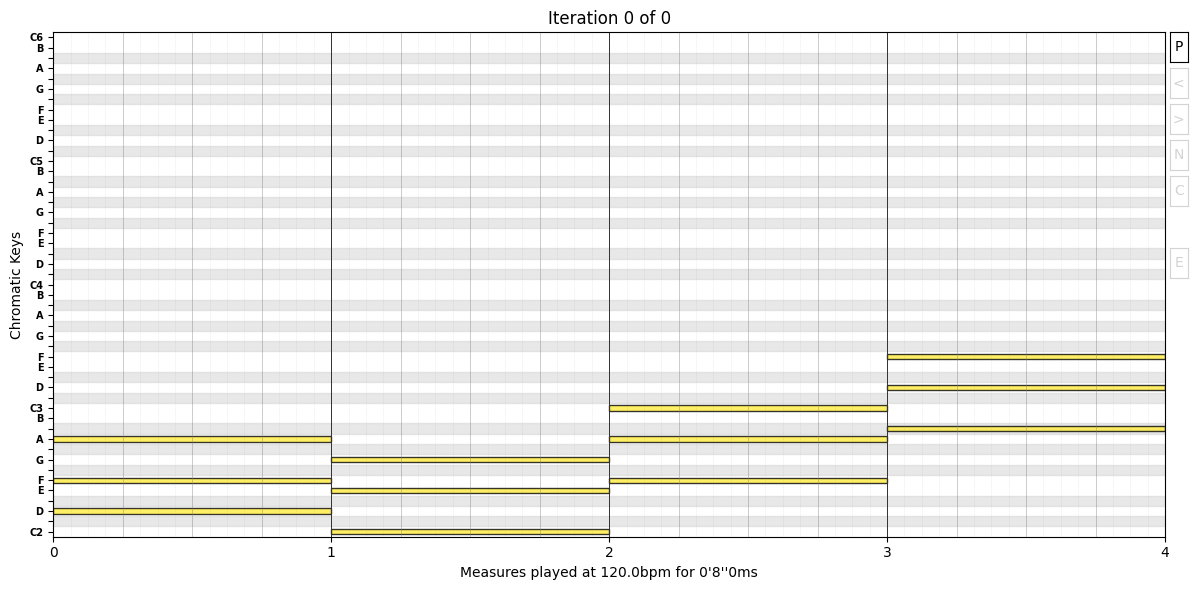

In [14]:
# Now the setting of the degrees given by the Roman numerals for each triad
four_chords << Foreach("i", "VII", "III", "VI")**Degree()
four_chords >> Plot()

In [15]:
four_chords[0] % ((Octave(), int()),) + four_chords[1] % ((Octave(), int()),)

(2, 2)

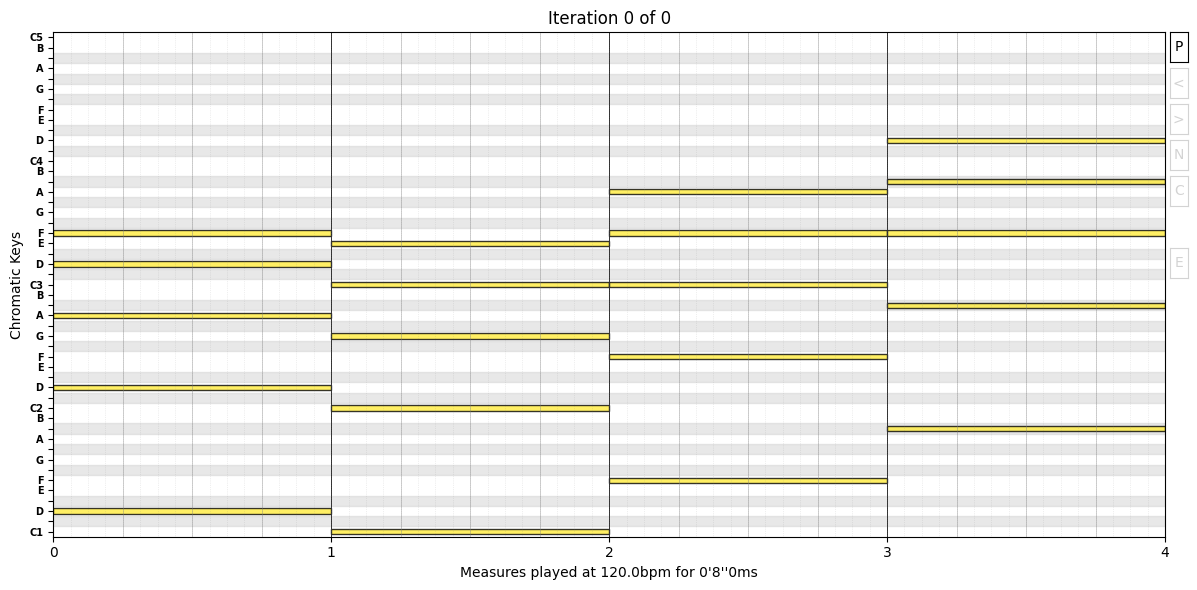

In [16]:
# Here the Clip automatically recognizes that it isn't a list of Elements and passes the list down to its elements
# In an ambiguous case of an empty list, like [], the Frame `All` shall be used, otherwise Clip will become empty!
four_chords << [Octave(-1), 0, 5.0 - 1, Octave(1), {1: 3.0 - 1}]
four_chords >> Plot()

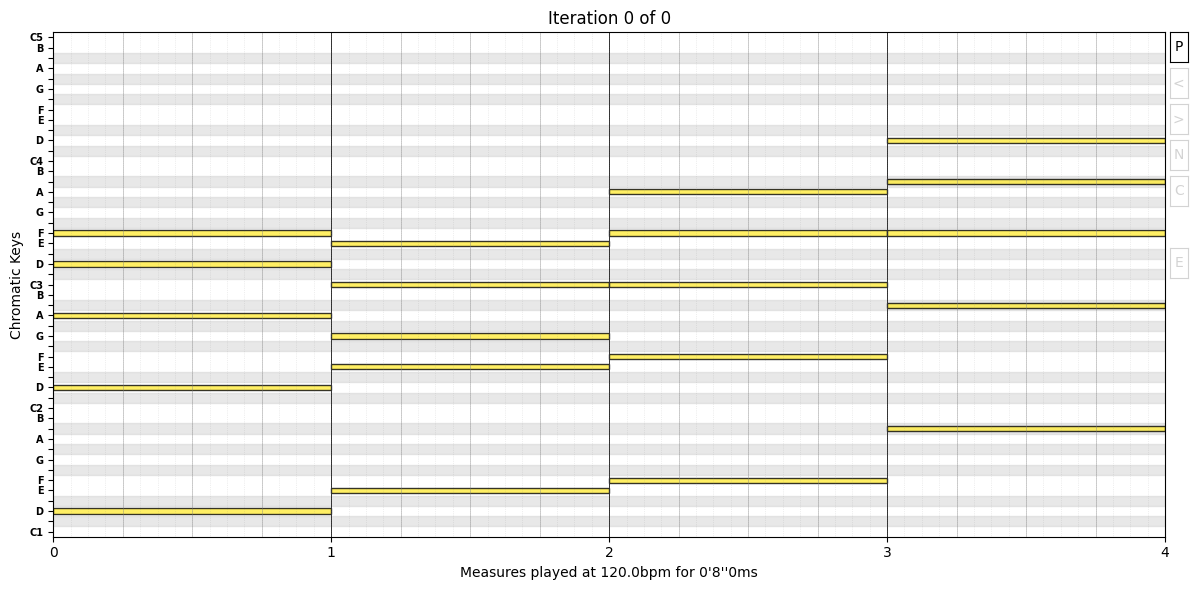

In [17]:
four_chords << Nth(2)**{0: {-1: 2.0}, 1: {0: 2.0}}
four_chords >> Plot()

In [19]:
# Because `Octave(1)` set above is returned as the object it is, it's preferable to
# set it as a dict this way instead, {1: 0}, so that it's printed accordingly.
four_chords[1] % list()

[{-1: 2.0}, {0: 2.0}, 4.0, <operand_unit.Octave at 0x23f143ee4a0>, {1: 2.0}]